In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
energy_df = pd.read_csv(
    "../Data Source/US Energy Consumption.csv")
energy_df.info()
energy_df["YYYYMM"] = energy_df["YYYYMM"].astype(str)
energy_df["Year"], energy_df["Month"] = energy_df["YYYYMM"].str[:4], energy_df["YYYYMM"].str[4:]
energy_df["Year"] = energy_df["Year"].astype(int)
energy_df.replace({"Not Available": 0},inplace=True)
energy_df["Value"] = pd.to_numeric(energy_df["Value"])
energy_df = energy_df.loc[energy_df["Month"] == "13"]
energy_df.drop(columns=["Month", "Column_Order", "YYYYMM", "Unit"], inplace=True)
energy_df = energy_df[["Year", "MSN",  "Description", "Value"]]
energy_df.rename(columns={"Value":"Energy Consumed (Quadrillion BTU)"}, inplace=True)
# Display sample data
energy_df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8244 entries, 0 to 8243
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           8244 non-null   object
 1   YYYYMM        8244 non-null   int64 
 2   Value         8244 non-null   object
 3   Column_Order  8244 non-null   int64 
 4   Description   8244 non-null   object
 5   Unit          8244 non-null   object
dtypes: int64(2), object(4)
memory usage: 386.6+ KB


Year      MSN                                        Description  \
0    1949  CLTCBUS                                   Coal Consumption   
1    1950  CLTCBUS                                   Coal Consumption   
2    1951  CLTCBUS                                   Coal Consumption   
3    1952  CLTCBUS                                   Coal Consumption   
4    1953  CLTCBUS                                   Coal Consumption   
..    ...      ...                                                ...   
707  1969  NNTCBUS  Natural Gas Consumption (Excluding Supplementa...   
708  1970  NNTCBUS  Natural Gas Consumption (Excluding Supplementa...   
709  1971  NNTCBUS  Natural Gas Consumption (Excluding Supplementa...   
710  1972  NNTCBUS  Natural Gas Consumption (Excluding Supplementa...   
723  1973  NNTCBUS  Natural Gas Consumption (Excluding Supplementa...   

     Energy Consumed (Quadrillion BTU)  
0                            11.980905  
1                            12.347109  
2                            12.552996  
3                            11.306479  
4                            11.372684  
..                                 ...  
707                          20.677984  
708                          21.794707  
709                          22.469052  
710                          22.698190  
723                          22.512399  

[100 rows x 4 columns]

In [3]:
sum_df = energy_df.groupby(["Year","MSN","Description"])["Energy Consumed (Quadrillion BTU)"].sum().reset_index()
sum_df.head()


energy_pt_df = sum_df.pivot_table(values="Energy Consumed (Quadrillion BTU)", index=['Year'], columns=["Description"],aggfunc="sum",fill_value=0)

energy_pt_df.info()

energy_pt_df = energy_pt_df.reset_index(0)
energy_pt_df = energy_pt_df[["Year","Coal Consumption", "Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)","Petroleum Consumption (Excluding Biofuels)",
                  "Total Fossil Fuels Consumption", "Nuclear Electric Power Consumption", 
                  "Biomass Energy Consumption", "Geothermal Energy Consumption","Hydroelectric Power Consumption", "Solar Energy Consumption", "Wind Energy Consumption",
                  "Total Renewable Energy Consumption", "Total Primary Energy Consumption"]]
energy_pt_df.rename(columns={})
energy_pt_df.head(50)

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 1949 to 2023
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Biomass Energy Consumption                                      75 non-null     float64
 1   Coal Consumption                                                75 non-null     float64
 2   Geothermal Energy Consumption                                   75 non-null     float64
 3   Hydroelectric Power Consumption                                 75 non-null     float64
 4   Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  75 non-null     float64
 5   Nuclear Electric Power Consumption                              75 non-null     float64
 6   Petroleum Consumption (Excluding Biofuels)                      75 non-null     float64
 7   Solar Energy Consumption                               

Description  Year  Coal Consumption  \
0            1949         11.980905   
1            1950         12.347109   
2            1951         12.552996   
3            1952         11.306479   
4            1953         11.372684   
5            1954          9.714667   
6            1955         11.167259   
7            1956         11.349723   
8            1957         10.820631   
9            1958          9.533287   
10           1959          9.518353   
11           1960          9.837785   
12           1961          9.623351   
13           1962          9.906454   
14           1963         10.412538   
15           1964         10.964385   
16           1965         11.580608   
17           1966         12.143080   
18           1967         11.913750   
19           1968         12.330677   
20           1969         12.381540   
21           1970         12.264528   
22           1971         11.598411   
23           1972         12.076917   
24           1973         12.971490   
25           1974         12.662878   
26           1975         12.662786   
27           1976         13.584067   
28           1977         13.922103   
29           1978         13.765575   
30           1979         15.039586   
31           1980         15.422809   
32           1981         15.907526   
33           1982         15.321581   
34           1983         15.894442   
35           1984         17.070622   
36           1985         17.478428   
37           1986         17.260405   
38           1987         18.008451   
39           1988         18.846312   
40           1989         19.069762   
41           1990         19.172635   
42           1991         18.991670   
43           1992         19.122471   
44           1993         19.835148   
45           1994         19.909463   
46           1995         20.088727   
47           1996         21.001914   
48           1997         21.445411   
49           1998         21.655744   

Description  Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
0                                                     5.145142                
1                                                     5.968371                
2                                                     7.048518                
3                                                     7.549621                
4                                                     7.906645                
5                                                     8.330202                
6                                                     8.997935                
7                                                     9.613975                
8                                                    10.190753                
9                                                    10.663199                
10                                                   11.717422                
11                                                   12.385366                
12                                                   12.926392                
13                                                   13.730841                
14                                                   14.403306                
15                                                   15.287850                
16                                                   15.768667                
17                                                   16.995332                
18                                                   17.944788                
19                                                   19.209656                
20                                                   20.677984                
21                                                   21.794707                
22                                                   22.469052                
23                                                   22.698190                
24                                 

In [4]:
sealevel_df = pd.read_csv(
    "../Data Source/Global_Sea_Level_change.csv", skiprows=6, header=0)
sealevel_df.drop(columns=["CSIRO - Lower error bound (inches)", "CSIRO - Upper error bound (inches)"], axis=1,inplace=True)
sealevel_df.info()
sealevel_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 142 non-null    int64  
 1   CSIRO - Adjusted sea level (inches)  134 non-null    float64
 2   NOAA - Adjusted sea level (inches)   29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


Year  CSIRO - Adjusted sea level (inches)  \
0   1880                             0.000000   
1   1881                             0.220472   
2   1882                            -0.440945   
3   1883                            -0.232283   
4   1884                             0.590551   
5   1885                             0.531496   
6   1886                             0.437008   
7   1887                             0.216535   
8   1888                             0.299213   
9   1889                             0.362205   
10  1890                             0.440945   
11  1891                             0.374016   
12  1892                             0.500000   
13  1893                             0.685039   
14  1894                             0.303150   
15  1895                             0.767717   
16  1896                             0.468504   
17  1897                             0.673228   
18  1898                             1.043307   
19  1899                             1.338583   

    NOAA - Adjusted sea level (inches)  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN  
5                                  NaN  
6                                  NaN  
7                                  NaN  
8                                  NaN  
9                                  NaN  
10                                 NaN  
11                                 NaN  
12                                 NaN  
13                                 NaN  
14                                 NaN  
15                                 NaN  
16                                 NaN  
17                                 NaN  
18                                 NaN  
19                                 NaN

In [5]:
energy_pt_df.head()

merged_df = energy_pt_df.merge(sealevel_df, on="Year", how='left')
# merged_df = merged_df[["Year","Coal Consumption", "Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)","Petroleum Consumption (Excluding Biofuels)",
#                   "Total Fossil Fuels Consumption", "Nuclear Electric Power Consumption", 
#                   "Biomass Energy Consumption", "Geothermal Energy Consumption","Hydroelectric Power Consumption", "Solar Energy Consumption", "Wind Energy Consumption",
#                   "Total Renewable Energy Consumption", "Total Primary Energy Consumption", "CSIRO - Adjusted sea level (inches)", "NOAA - Adjusted sea level (inches)"]]
merged_df.tail(50)

Year  Coal Consumption  \
25  1974         12.662878   
26  1975         12.662786   
27  1976         13.584067   
28  1977         13.922103   
29  1978         13.765575   
30  1979         15.039586   
31  1980         15.422809   
32  1981         15.907526   
33  1982         15.321581   
34  1983         15.894442   
35  1984         17.070622   
36  1985         17.478428   
37  1986         17.260405   
38  1987         18.008451   
39  1988         18.846312   
40  1989         19.069762   
41  1990         19.172635   
42  1991         18.991670   
43  1992         19.122471   
44  1993         19.835148   
45  1994         19.909463   
46  1995         20.088727   
47  1996         21.001914   
48  1997         21.445411   
49  1998         21.655744   
50  1999         21.622544   
51  2000         22.579528   
52  2001         21.914268   
53  2002         21.903989   
54  2003         22.320928   
55  2004         22.466195   
56  2005         22.796543   
57  2006         22.447160   
58  2007         22.749466   
59  2008         22.387437   
60  2009         19.691205   
61  2010         20.833968   
62  2011         19.657784   
63  2012         17.378234   
64  2013         18.038633   
65  2014         17.997632   
66  2015         15.548870   
67  2016         14.225905   
68  2017         13.837465   
69  2018         13.251532   
70  2019         11.315595   
71  2020          9.181109   
72  2021         10.548526   
73  2022          9.887939   
74  2023          8.180450   

    Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
25                                          21.732488                
26                                          19.947883                
27                                          20.345426                
28                                          19.930513                
29                                          20.000400                
30                                          20.665817                
31                                          20.235459                
32                                          19.747310                
33                                          18.356222                
34                                          17.220836                
35                                          18.393613                
36                                          17.703482                
37                                          16.591364                
38                                          17.639801                
39                                          18.448393                
40                                          19.601606                
41                                          19.603267                
42                                          20.032958                
43                                          20.713632                
44                                          21.229000                
45                                          21.728067                
46                                          22.671139                
47                                          23.084647                
48                                          23.222716                
49                                          22.830226                
50                                          22.909227                
51                                          23.823977                
52                                          22.772558                
53                                          23.510081                
54                                          22.830642                
55                                          22.923061                
56                                          22.565364                
57                                          22.238738                
58                                          23.662759                
59                     

In [6]:
precipitation_df = pd.read_csv(
    "../Data Source/US_Precipitation_Change.csv", skiprows=6, header=0)
precipitation_df.rename(columns={"Anomaly":"Precipitation Change"}, inplace=True)
precipitation_df.info()
precipitation_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  121 non-null    int64  
 1   Precipitation Change  121 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


Year  Precipitation Change
0   1901                 -2.31
1   1902                  0.69
2   1903                 -0.58
3   1904                 -1.99
4   1905                  2.66
5   1906                  2.90
6   1907                  1.00
7   1908                 -0.14
8   1909                  1.25
9   1910                 -5.03
10  1911                 -0.42
11  1912                  0.54
12  1913                 -0.10
13  1914                 -1.13
14  1915                  2.83
15  1916                 -0.52
16  1917                 -4.59
17  1918                 -1.16
18  1919                  1.82
19  1920                  1.36

In [7]:
merged_df = merged_df.merge(precipitation_df, on="Year",how='left')
merged_df.tail(50)

Year  Coal Consumption  \
25  1974         12.662878   
26  1975         12.662786   
27  1976         13.584067   
28  1977         13.922103   
29  1978         13.765575   
30  1979         15.039586   
31  1980         15.422809   
32  1981         15.907526   
33  1982         15.321581   
34  1983         15.894442   
35  1984         17.070622   
36  1985         17.478428   
37  1986         17.260405   
38  1987         18.008451   
39  1988         18.846312   
40  1989         19.069762   
41  1990         19.172635   
42  1991         18.991670   
43  1992         19.122471   
44  1993         19.835148   
45  1994         19.909463   
46  1995         20.088727   
47  1996         21.001914   
48  1997         21.445411   
49  1998         21.655744   
50  1999         21.622544   
51  2000         22.579528   
52  2001         21.914268   
53  2002         21.903989   
54  2003         22.320928   
55  2004         22.466195   
56  2005         22.796543   
57  2006         22.447160   
58  2007         22.749466   
59  2008         22.387437   
60  2009         19.691205   
61  2010         20.833968   
62  2011         19.657784   
63  2012         17.378234   
64  2013         18.038633   
65  2014         17.997632   
66  2015         15.548870   
67  2016         14.225905   
68  2017         13.837465   
69  2018         13.251532   
70  2019         11.315595   
71  2020          9.181109   
72  2021         10.548526   
73  2022          9.887939   
74  2023          8.180450   

    Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
25                                          21.732488                
26                                          19.947883                
27                                          20.345426                
28                                          19.930513                
29                                          20.000400                
30                                          20.665817                
31                                          20.235459                
32                                          19.747310                
33                                          18.356222                
34                                          17.220836                
35                                          18.393613                
36                                          17.703482                
37                                          16.591364                
38                                          17.639801                
39                                          18.448393                
40                                          19.601606                
41                                          19.603267                
42                                          20.032958                
43                                          20.713632                
44                                          21.229000                
45                                          21.728067                
46                                          22.671139                
47                                          23.084647                
48                                          23.222716                
49                                          22.830226                
50                                          22.909227                
51                                          23.823977                
52                                          22.772558                
53                                          23.510081                
54                                          22.830642                
55                                          22.923061                
56                                          22.565364                
57                                          22.238738                
58                                          23.662759                
59                     

In [8]:
temperature_df = pd.read_csv(
    "../Data Source/US_Temperature_Change_On_Land v2.csv", skiprows=0, header=0)
#temperature_df.rename(columns={"Anomaly":"Precipitation Change"}, inplace=True)
temperature_df = temperature_df[["Year", "Value"]]
temperature_df.rename(columns={"Value":"Temperature Change (Celcius)"}, inplace=True)
temperature_df.info()
temperature_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          54 non-null     int64  
 1   Temperature Change (Celcius)  54 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


Year  Temperature Change (Celcius)
0   1970                        -0.020
1   1971                        -0.411
2   1972                        -0.257
3   1973                        -0.025
4   1974                         0.092
5   1975                        -0.367
6   1976                        -0.120
7   1977                         0.400
8   1978                         0.022
9   1979                        -0.337
10  1980                         0.410
11  1981                         0.872
12  1982                        -0.351
13  1983                         0.551
14  1984                        -0.230
15  1985                        -0.028
16  1986                         0.584
17  1987                         0.920
18  1988                         0.483
19  1989                         0.316

In [9]:
merged_df = merged_df.merge(temperature_df, on="Year", how='left')
merged_df.tail(50)

Year  Coal Consumption  \
25  1974         12.662878   
26  1975         12.662786   
27  1976         13.584067   
28  1977         13.922103   
29  1978         13.765575   
30  1979         15.039586   
31  1980         15.422809   
32  1981         15.907526   
33  1982         15.321581   
34  1983         15.894442   
35  1984         17.070622   
36  1985         17.478428   
37  1986         17.260405   
38  1987         18.008451   
39  1988         18.846312   
40  1989         19.069762   
41  1990         19.172635   
42  1991         18.991670   
43  1992         19.122471   
44  1993         19.835148   
45  1994         19.909463   
46  1995         20.088727   
47  1996         21.001914   
48  1997         21.445411   
49  1998         21.655744   
50  1999         21.622544   
51  2000         22.579528   
52  2001         21.914268   
53  2002         21.903989   
54  2003         22.320928   
55  2004         22.466195   
56  2005         22.796543   
57  2006         22.447160   
58  2007         22.749466   
59  2008         22.387437   
60  2009         19.691205   
61  2010         20.833968   
62  2011         19.657784   
63  2012         17.378234   
64  2013         18.038633   
65  2014         17.997632   
66  2015         15.548870   
67  2016         14.225905   
68  2017         13.837465   
69  2018         13.251532   
70  2019         11.315595   
71  2020          9.181109   
72  2021         10.548526   
73  2022          9.887939   
74  2023          8.180450   

    Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
25                                          21.732488                
26                                          19.947883                
27                                          20.345426                
28                                          19.930513                
29                                          20.000400                
30                                          20.665817                
31                                          20.235459                
32                                          19.747310                
33                                          18.356222                
34                                          17.220836                
35                                          18.393613                
36                                          17.703482                
37                                          16.591364                
38                                          17.639801                
39                                          18.448393                
40                                          19.601606                
41                                          19.603267                
42                                          20.032958                
43                                          20.713632                
44                                          21.229000                
45                                          21.728067                
46                                          22.671139                
47                                          23.084647                
48                                          23.222716                
49                                          22.830226                
50                                          22.909227                
51                                          23.823977                
52                                          22.772558                
53                                          23.510081                
54                                          22.830642                
55                                          22.923061                
56                                          22.565364                
57                                          22.238738                
58                                          23.662759                
59                     

In [10]:
merged_combine_df = merged_df.copy()
merged_combine_df["NOAA - Adjusted sea level (inches)"] = merged_combine_df["NOAA - Adjusted sea level (inches)"].fillna(merged_combine_df['CSIRO - Adjusted sea level (inches)'])
merged_combine_df.drop(columns=['CSIRO - Adjusted sea level (inches)'], inplace=True)
merged_combine_df.rename(columns={"NOAA - Adjusted sea level (inches)":"Adjusted sea level (inches)"}, inplace=True)

merged_combine_df.tail(50)

Year  Coal Consumption  \
25  1974         12.662878   
26  1975         12.662786   
27  1976         13.584067   
28  1977         13.922103   
29  1978         13.765575   
30  1979         15.039586   
31  1980         15.422809   
32  1981         15.907526   
33  1982         15.321581   
34  1983         15.894442   
35  1984         17.070622   
36  1985         17.478428   
37  1986         17.260405   
38  1987         18.008451   
39  1988         18.846312   
40  1989         19.069762   
41  1990         19.172635   
42  1991         18.991670   
43  1992         19.122471   
44  1993         19.835148   
45  1994         19.909463   
46  1995         20.088727   
47  1996         21.001914   
48  1997         21.445411   
49  1998         21.655744   
50  1999         21.622544   
51  2000         22.579528   
52  2001         21.914268   
53  2002         21.903989   
54  2003         22.320928   
55  2004         22.466195   
56  2005         22.796543   
57  2006         22.447160   
58  2007         22.749466   
59  2008         22.387437   
60  2009         19.691205   
61  2010         20.833968   
62  2011         19.657784   
63  2012         17.378234   
64  2013         18.038633   
65  2014         17.997632   
66  2015         15.548870   
67  2016         14.225905   
68  2017         13.837465   
69  2018         13.251532   
70  2019         11.315595   
71  2020          9.181109   
72  2021         10.548526   
73  2022          9.887939   
74  2023          8.180450   

    Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
25                                          21.732488                
26                                          19.947883                
27                                          20.345426                
28                                          19.930513                
29                                          20.000400                
30                                          20.665817                
31                                          20.235459                
32                                          19.747310                
33                                          18.356222                
34                                          17.220836                
35                                          18.393613                
36                                          17.703482                
37                                          16.591364                
38                                          17.639801                
39                                          18.448393                
40                                          19.601606                
41                                          19.603267                
42                                          20.032958                
43                                          20.713632                
44                                          21.229000                
45                                          21.728067                
46                                          22.671139                
47                                          23.084647                
48                                          23.222716                
49                                          22.830226                
50                                          22.909227                
51                                          23.823977                
52                                          22.772558                
53                                          23.510081                
54                                          22.830642                
55                                          22.923061                
56                                          22.565364                
57                                          22.238738                
58                                          23.662759                
59                     

In [11]:
# merged_df.fillna(0, inplace=True)
# merged_df.to_csv("../Data Source/combined.csv", index=False)
# merged_combine_df.fillna(0, inplace=True)
# merged_combine_df.to_csv("../Data Source/combined_single_sealevel.csv", index=False)

In [12]:
merged_combine_df.describe()

Year  Coal Consumption  \
count    75.000000         75.000000   
mean   1986.000000         15.434307   
std      21.794495          4.449271   
min    1949.000000          8.180450   
25%    1967.500000         11.589510   
50%    1986.000000         14.225905   
75%    2004.500000         19.415209   
max    2023.000000         22.796543   

       Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
count                                          75.000000                
mean                                           20.083914                
std                                             6.626165                
min                                             5.145142                
25%                                            17.108084                
50%                                            20.677984                
75%                                            23.319328                
max                                            33.608138                

       Petroleum Consumption (Excluding Biofuels)  \
count                                   75.000000   
mean                                    30.621249   
std                                      7.688610   
min                                     11.868994   
25%                                     26.120189   
50%                                     33.587587   
75%                                     35.650415   
max                                     40.216568   

       Total Fossil Fuels Consumption  Nuclear Electric Power Consumption  \
count                       75.000000                           75.000000   
mean                        66.145136                            4.292444   
std                         16.529098                            3.511660   
min                         28.988371                            0.000000   
25%                         56.803306                            0.114995   
50%                         71.507048                            4.380109   
75%                         79.157291                            8.081325   
max                         85.805032                            8.458589   

       Biomass Energy Consumption  Geothermal Energy Consumption  \
count                   75.000000                      75.000000   
mean                     2.718825                       0.046936   
std                      1.265043                       0.045353   
min                      1.294762                       0.000000   
25%                      1.457428                       0.001283   
50%                      2.781797                       0.035144   
75%                      3.158081                       0.082131   
max                      5.104513                       0.119668   

       Hydroelectric Power Consumption  Solar Energy Consumption  \
count                        75.000000                 75.000000   
mean                          0.832474                  0.081642   
std                           0.227363                  0.171752   
min                           0.323365                  0.000000   
25%                           0.751595                  0.000000   
50%                           0.901890                  0.000036   
75%                           0.976171                  0.062967   
max                           1.216219                  0.877540   

       Wind Energy Consumption  Total Renewable Energy Consumption  \
count                75.000000                           75.000000   
mean                  0.173416                            3.853293   
std                   0.368499                            1.861848   
min                   0.000000                            1.775242   
25%                   0.000000                            2.150257   
50%                   0.000014                            3.822682   
75%                   0.054514                            4.471824   
max                   1.481823       

In [13]:
merged_combine_df.dtypes

Year                                                                int64
Coal Consumption                                                  float64
Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)    float64
Petroleum Consumption (Excluding Biofuels)                        float64
Total Fossil Fuels Consumption                                    float64
Nuclear Electric Power Consumption                                float64
Biomass Energy Consumption                                        float64
Geothermal Energy Consumption                                     float64
Hydroelectric Power Consumption                                   float64
Solar Energy Consumption                                          float64
Wind Energy Consumption                                           float64
Total Renewable Energy Consumption                                float64
Total Primary Energy Consumption                                  float64
Adjusted sea level (inches)           

# Correlation Table

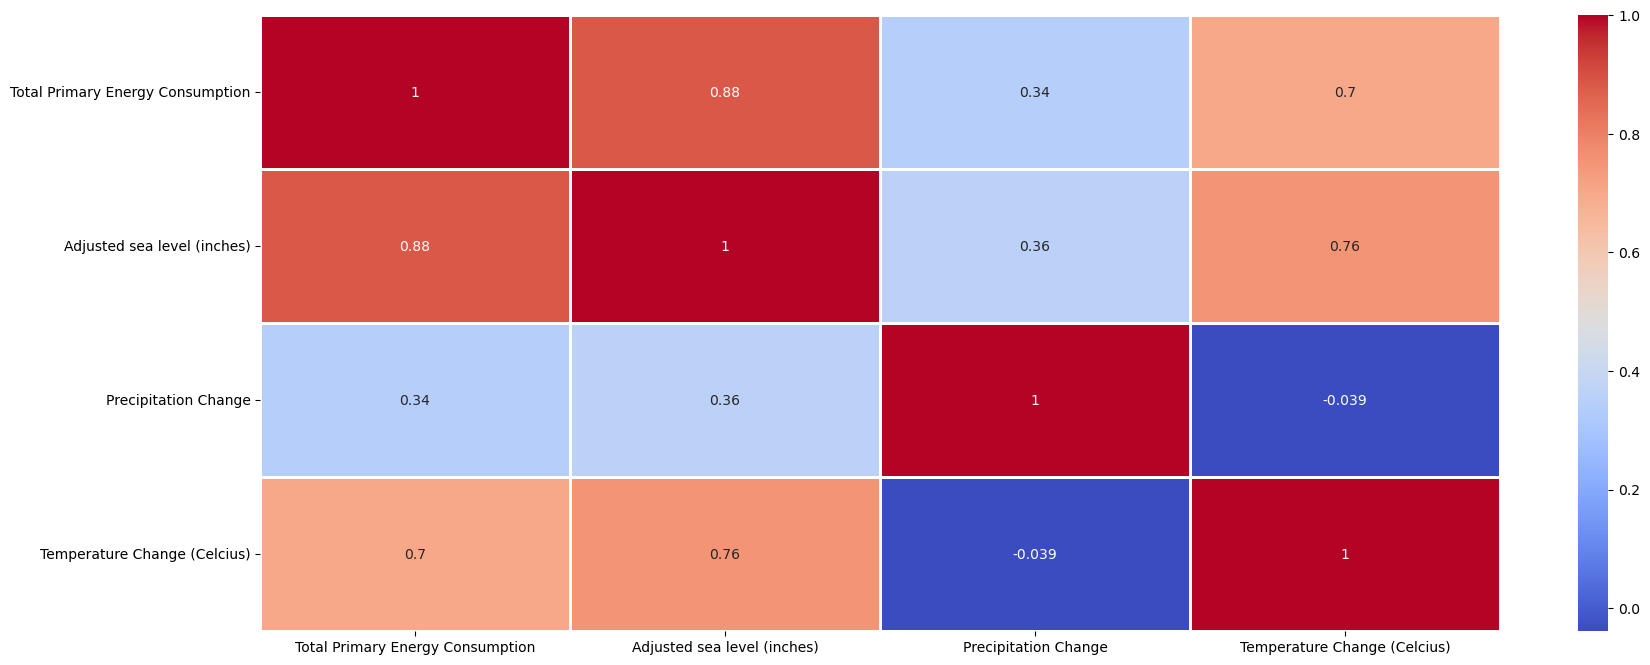

In [14]:
subset_df = merged_combine_df[['Total Primary Energy Consumption',
                               'Adjusted sea level (inches)','Precipitation Change',
                               'Temperature Change (Celcius)']]
# Create matplotlib figure
plt.figure(figsize = (20,8))
sns.heatmap(subset_df.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
# fmt = .1e (scientific notation), .2f (2 decimal places), .3g(3 significant figures), .2%(percentage with 2 decimal places)
plt.xticks(rotation='horizontal')
plt.savefig('Data_visualization_images/Correlation_Table.png')

# Overall Energy Consumption Trend Over Year

/Users/loanho/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/loanho/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/loanho/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/loanho/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

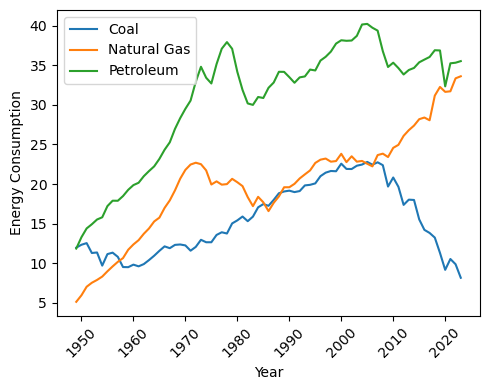

In [15]:
# Energy Consumption Trends
plt.figure(figsize=(5, 4))
sns.lineplot(x='Year', y='Coal Consumption', data=merged_combine_df, label='Coal')
sns.lineplot(x='Year', y='Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)', data=merged_combine_df, label='Natural Gas')
sns.lineplot(x='Year', y='Petroleum Consumption (Excluding Biofuels)', data=merged_combine_df, label='Petroleum')
# sns.lineplot(x='Year', y='Nuclear Electric Power Consumption', data=merged_combine_df, label='Nuclear')
# sns.lineplot(x='Year', y='Total Renewable Energy Consumption', data=merged_combine_df, label='Renewable')
# plt.title('Energy Consumption Trends by Source')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Data_visualization_images/Energy_Consumption_Over_Year.png')
plt.show()

# Renewable vs. Non-renewable Energy Consumption

<Figure size 1200x800 with 0 Axes>

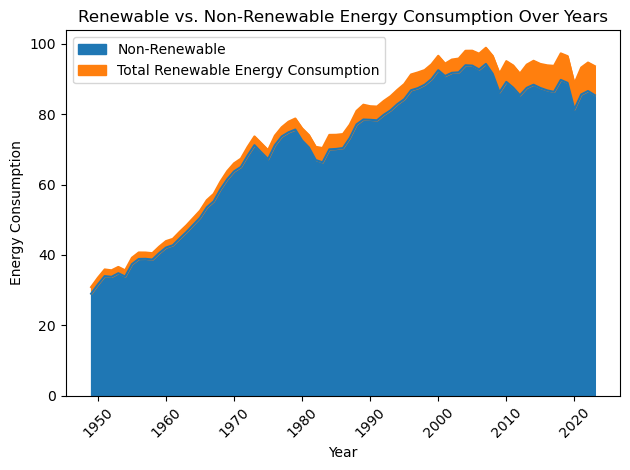

In [16]:
# Comparison of Renewable vs. Non-renewable Energy Consumption
plt.figure(figsize=(12, 8))
merged_combine_df.set_index('Year', inplace=True)
merged_combine_df['Non-Renewable'] = merged_combine_df['Total Fossil Fuels Consumption'] + merged_combine_df['Nuclear Electric Power Consumption']
merged_combine_df[['Non-Renewable', 'Total Renewable Energy Consumption']].plot.area()
plt.title('Renewable vs. Non-Renewable Energy Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('Data_visualization_images/Renewable_vs_Non_renewable.png')
plt.show()

# Energy Consumption and Environmental Indicators Over Years

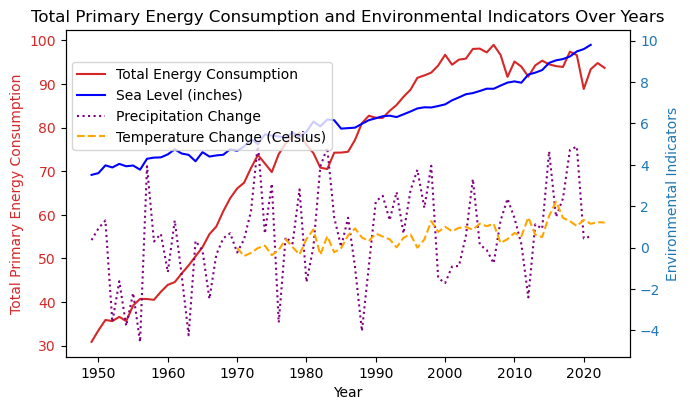

In [17]:
# Overal energy consumption based on enviroment
fig, ax1 = plt.subplots(figsize=(7, 4))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Primary Energy Consumption', color=color)
ax1.plot(merged_combine_df.index, merged_combine_df['Total Primary Energy Consumption'], color=color, label='Total Energy Consumption')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiating a second y-axis to share the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Environmental Indicators', color=color)  # we will plot CSIRO, NOAA sea levels, Precipitation, and Temperature change on this axis
ax2.plot(merged_combine_df.index, merged_combine_df['Adjusted sea level (inches)'], color='blue', label='Sea Level (inches)')
ax2.plot(merged_combine_df.index, merged_combine_df['Precipitation Change'], color='purple', label='Precipitation Change', linestyle=':')
ax2.plot(merged_combine_df.index, merged_combine_df['Temperature Change (Celcius)'], color='orange', label='Temperature Change (Celsius)', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To make sure that the labels don't get cut off
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Total Primary Energy Consumption and Environmental Indicators Over Years')
plt.savefig('Data_visualization_images/Energy_Consumption_vs_Enviromental_Indicators.png')
plt.show()

# Total Energy Consumption vs. Temperature Change

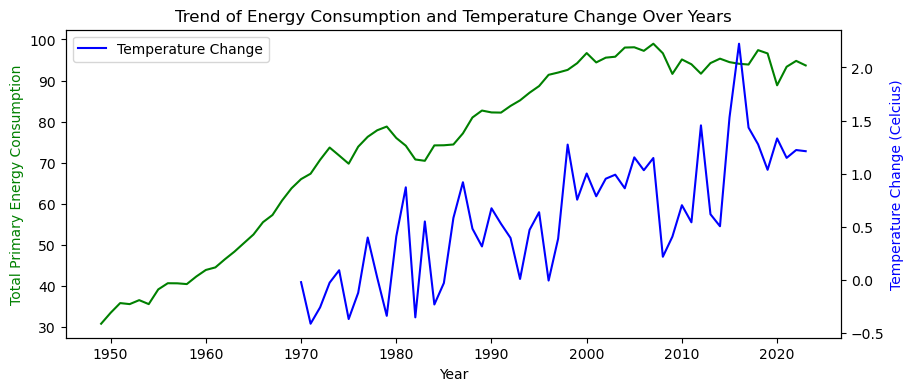

In [18]:
# Line plot for 'Total Primary Energy Consumption' over the years with a secondary axis for 'Temperature Change'

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ax1.plot(merged_combine_df.index, merged_combine_df['Total Primary Energy Consumption'], 'g-', label = 'Energy Consumption')
ax2.plot(merged_combine_df.index, merged_combine_df['Temperature Change (Celcius)'],'b-', label = 'Temperature Change')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Primary Energy Consumption', color='g')
ax2.set_ylabel('Temperature Change (Celcius)', color='b')

plt.title('Trend of Energy Consumption and Temperature Change Over Years')
plt.legend()
plt.savefig('Data_visualization_images/Energy_Consumption_vs_Temperature_Change.png')
plt.show()

# Total Energy Consumption vs. Precipitation Change

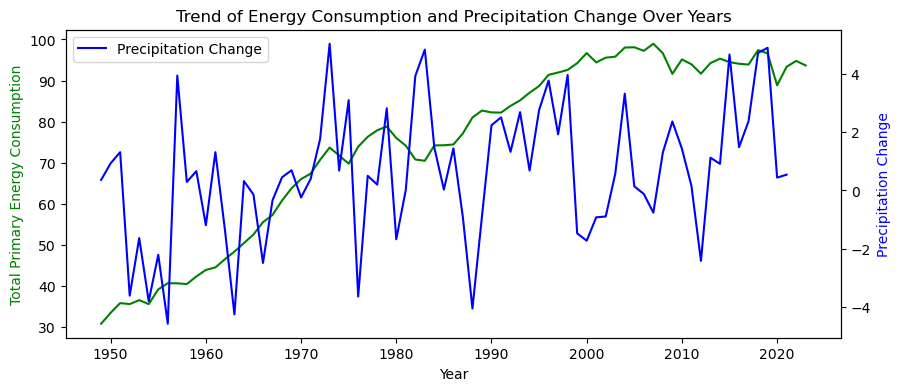

In [19]:
# Line plot for 'Total Primary Energy Consumption' over the years with a secondary axis for 'Precipitation Change'

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ax1.plot(merged_combine_df.index, merged_combine_df['Total Primary Energy Consumption'], 'g-', label = 'Energy Consumption')
ax2.plot(merged_combine_df.index, merged_combine_df['Precipitation Change'],'b-', label = 'Precipitation Change')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Primary Energy Consumption', color='g')
ax2.set_ylabel('Precipitation Change', color='b')

plt.title('Trend of Energy Consumption and Precipitation Change Over Years')
plt.legend()
plt.savefig('Data_visualization_images/Energy_Consumption_vs_Precipitation_Change.png')
plt.show()

# Total Energy Consumption vs. Sea Level

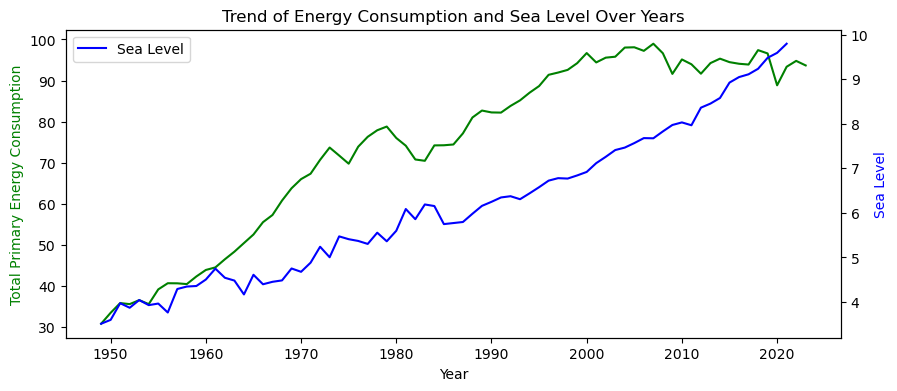

In [20]:
# Line plot for 'Total Primary Energy Consumption' over the years with a secondary axis for 'Sea Level'

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ax1.plot(merged_combine_df.index, merged_combine_df['Total Primary Energy Consumption'], 'g-', label = 'Energy Consumption')
ax2.plot(merged_combine_df.index, merged_combine_df['Adjusted sea level (inches)'],'b-', label = 'Sea Level')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Primary Energy Consumption', color='g')
ax2.set_ylabel('Sea Level', color='b')

plt.title('Trend of Energy Consumption and Sea Level Over Years')
plt.legend()
plt.savefig('Data_visualization_images/Energy_Consumption_vs_Sea_Level.png')
plt.show()

# Change in Energy Consumption within 20 years

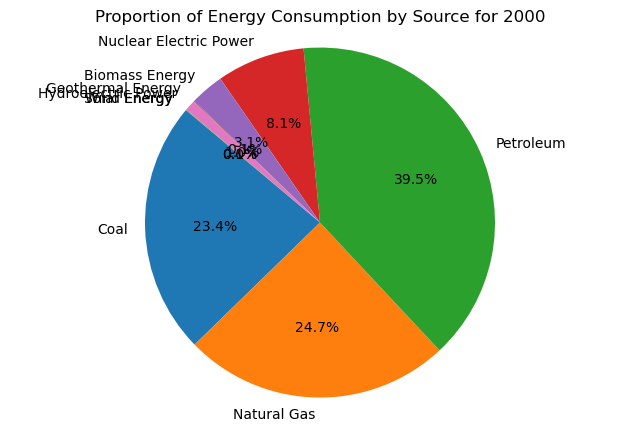

In [21]:
# Selecting the data for year 2000
data_2000 = merged_combine_df[merged_combine_df.index == 2000]

# Extracting energy consumption types excluding the totals
energy_types = ['Coal Consumption', 'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)', 
                'Petroleum Consumption (Excluding Biofuels)', 'Nuclear Electric Power Consumption', 
                'Biomass Energy Consumption', 'Geothermal Energy Consumption', 
                'Hydroelectric Power Consumption', 'Solar Energy Consumption', 'Wind Energy Consumption']
labels = ['Coal', 'Natural Gas', 'Petroleum', 'Nuclear Electric Power', 
          'Biomass Energy', 'Geothermal Energy', 
          'Hydroelectric Power', 'Solar Energy', 'Wind Energy']
# Flatten to get a 1D array of values
consumption_values = data_2000[energy_types].values.flatten()  

# Creating a pie chart
plt.figure(figsize=(8, 5))
plt.pie(consumption_values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Energy Consumption by Source for 2000')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Data_visualization_images/Energy_Consumption_vs_Temperature_Change.png')
plt.savefig('Data_visualization_images/Energy_Consumption_2000.png')
plt.show()

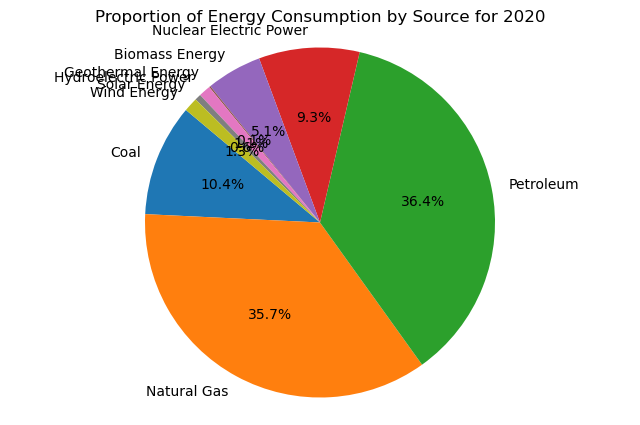

In [22]:
# Selecting the data for year 2020
data_2020 = merged_combine_df[merged_combine_df.index == 2020]

# Extracting energy consumption types excluding the totals
energy_types = ['Coal Consumption', 'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)', 
                'Petroleum Consumption (Excluding Biofuels)', 'Nuclear Electric Power Consumption', 
                'Biomass Energy Consumption', 'Geothermal Energy Consumption', 
                'Hydroelectric Power Consumption', 'Solar Energy Consumption', 'Wind Energy Consumption']
labels = ['Coal', 'Natural Gas', 'Petroleum', 'Nuclear Electric Power', 
          'Biomass Energy', 'Geothermal Energy', 
          'Hydroelectric Power', 'Solar Energy', 'Wind Energy']
# Flatten to get a 1D array of values
consumption_values = data_2020[energy_types].values.flatten()  

# Creating a pie chart
plt.figure(figsize=(8, 5))
plt.pie(consumption_values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Energy Consumption by Source for 2020')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Data_visualization_images/Energy_Consumption2020.png')
plt.show()